# Start van het project

1. Data uit mongoDB halen om in een csv te steken.

In [106]:
# extract query result to
%matplotlib inline
%reset
low_memory=False
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import math
import os
import ast
import seaborn as sns


client = MongoClient("mongodb://localhost:27017/")
 
db = client["lifesnaps"]
collection = db["fitbit"]
doc = collection.find_one({"type": "estimated_oxygen_variation"})
print(doc)

{'_id': ObjectId('62cc1f9ab41dcd4b1beae820'), 'id': ObjectId('621e2e8e67b776a24055b564'), 'type': 'estimated_oxygen_variation', 'data': {'timestamp': '05/24/21 01:03:30', 'Infrared to Red Signal Ratio': -4}}


Test query en queries om de data in een list te steken.

In [84]:

# test query
# from bson import ObjectId

# query = {
#     "type": "lightly_active_minutes"
# }
# docs = collection.find(query).limit(10)
# for doc in docs:
#     print(doc)

# Adjust your query as needed



# query = {
#     "type": "sleep"
# }  
# dataSleep = list(collection.find(query))

# query = {
#     "type": "steps"
# }
# dataSteps = list(collection.find(query))

# query = {
#     "type": "lightly_active_minutes"
# }
# dataLightlyActiveMinutes = list(collection.find(query))

# query = {
#     "type": "moderately_active_minutes"
# }
# dataModeratlyActiveMinutes = list(collection.find(query))

# query = {
#     "type": "very_active_minutes"
# }
# dataVeryActiveMinutes = list(collection.find(query))


# Kobe

# query = {
#     "type": "sedentary_minutes"
# }
# dataSedentaryMinutes = list(collection.find(query))

# query = {
#     "type": "Profile"
# }
# dataProfile = list(collection.find(query))

# query = {
#     "type": "Daily Heart Rate Variability Summary"
# }
# dataDailyHeartRateVariabilitySummary = list(collection.find(query)) 

# query = {
#     "type": "resting_heart_rate"
# }
# dataRestingHeartRate = list(collection.find(query))

De code om de data naar individuele csv om te zetten

In [85]:
# query = {
#     "type": "very_active_minutes"
# }
# dataVeryActiveMinutes = list(collection.find(query))

# df = pd.DataFrame(dataVeryActiveMinutes)

# csv = "very_active_minutes"

# df.to_csv(f"{csv}.csv", index=False)

# print(f"Data has been saved to {csv}.csv")


## Sema database omzetten naar CSV


In [86]:
client = MongoClient("mongodb://localhost:27017/")
 
db = client["lifesnaps"]
collection = db["sema"]
doc = collection.find_one({"data.SURVEY_NAME": "Context and Mood Survey"})
print(doc)

{'_id': ObjectId('62cc7d568e3d174ffc0fbb47'), 'user_id': ObjectId('621e2f1b67b776a240b3d87c'), 'data': {'PARTICIPANT_ID': 's523044002', 'STUDY_ID': 'uk96OixJ-', 'STUDY_NAME': 'RAIS Consortium Experiment v2.0', 'STUDY_VERSION': 5, 'SURVEY_ID': 'BjTcu3Lg-', 'SURVEY_NAME': 'Context and Mood Survey', 'TRIGGER': 'scheduled', 'START_END': 1, 'CREATED_TS': '2021-12-15T15:26:00', 'SCHEDULED_TS': '2021-12-15T15:16:00', 'STARTED_TS': '2021-12-15T15:26:00', 'COMPLETED_TS': '2021-12-15T15:26:00', 'EXPIRED_TS': None, 'UPLOADED_TS': '2021-12-15T15:26:00', 'TOTAL_RT': '10030', 'RAND_PROB': '<no-response>', 'PLACE': 'HOME', 'PLACE_RT': '2440', 'OTHER': '<not-shown>', 'OTHER_RT': '<not-shown>', 'MOOD': 'TENSE/ANXIOUS', 'MOOD_RT': '7590', 'STEPS': '<no-response>', 'STEPS_RT': '<no-response>'}}


In [87]:

# test query
from bson import ObjectId

query = {
    "data.SURVEY_NAME": "Context and Mood Survey"
}
docs = collection.find(query).limit(10)
for doc in docs:
    print(doc)

{'_id': ObjectId('62cc7d568e3d174ffc0fbb47'), 'user_id': ObjectId('621e2f1b67b776a240b3d87c'), 'data': {'PARTICIPANT_ID': 's523044002', 'STUDY_ID': 'uk96OixJ-', 'STUDY_NAME': 'RAIS Consortium Experiment v2.0', 'STUDY_VERSION': 5, 'SURVEY_ID': 'BjTcu3Lg-', 'SURVEY_NAME': 'Context and Mood Survey', 'TRIGGER': 'scheduled', 'START_END': 1, 'CREATED_TS': '2021-12-15T15:26:00', 'SCHEDULED_TS': '2021-12-15T15:16:00', 'STARTED_TS': '2021-12-15T15:26:00', 'COMPLETED_TS': '2021-12-15T15:26:00', 'EXPIRED_TS': None, 'UPLOADED_TS': '2021-12-15T15:26:00', 'TOTAL_RT': '10030', 'RAND_PROB': '<no-response>', 'PLACE': 'HOME', 'PLACE_RT': '2440', 'OTHER': '<not-shown>', 'OTHER_RT': '<not-shown>', 'MOOD': 'TENSE/ANXIOUS', 'MOOD_RT': '7590', 'STEPS': '<no-response>', 'STEPS_RT': '<no-response>'}}
{'_id': ObjectId('62cc7d568e3d174ffc0fbb49'), 'user_id': ObjectId('621e340467b776a2402d7982'), 'data': {'PARTICIPANT_ID': 's926411913', 'STUDY_ID': 'uk96OixJ-', 'STUDY_NAME': 'RAIS Consortium Experiment v2.0', 'ST

In [88]:
query = {
    "data.SURVEY_NAME": "Context and Mood Survey"
}

data = list(collection.find(query))

df_sleep = pd.DataFrame(data)

csv = "survey_result"

df_sleep.to_csv(f"{csv}.csv", index=False)

print(f"Data has been saved to {csv}.csv")

Data has been saved to survey_result.csv


## Transform data from mood csv into usable format
- make columns from the fields within data

Mood survey word 3 keer per dag afgenomen. 

In [89]:
csv = "survey_result"

df_sleep = pd.read_csv(f"{csv}.csv")

df_sleep['data'] = df_sleep['data'].apply(eval)
df_expanded = pd.concat(
    [df_sleep.drop(columns=['data']), df_sleep['data'].apply(pd.Series)],
    axis=1
)
df_expanded = df_expanded.drop(columns=['_id'], errors='ignore')

df_expanded.to_csv(f"{csv}_expanded.csv", index=False)


- remove useless columns into new dataframe

“SCHEDULED_TS” (i.e., the timestamp from when the survey was scheduled, e.g., when the participant received the notification) <sup>1</sup>

<sup>1</sup>https://www.nature.com/articles/s41597-022-01764-x#Sec20



In [90]:
df_survey = pd.read_csv('survey_result_expanded.csv')

df_survey_clean = df_survey[[
    'user_id', 'SCHEDULED_TS', 'MOOD'
    ]]

df_survey_clean = df_survey_clean.replace('<no-response>', np.NaN)

df_survey_clean = df_survey_clean.dropna()


df_survey_clean['SCHEDULED_TS'] = pd.to_datetime(df_survey_clean['SCHEDULED_TS']).dt.date

# print(df_survey_clean['MOOD'].unique())

moods = {
        'TENSE/ANXIOUS': -1, 'TIRED': -1, 'RESTED/RELAXED': 1, 'NEUTRAL': 0, 
        'HAPPY': 1, 'ALERT': -1, 'SAD': -1, 'SURPRISE': 0, 'FEAR': -1, 
        'ANGER': -1, 'SADNESS': -1, 'JOY': 1
        }

df_survey_clean['MOOD'] = df_survey_clean['MOOD'].map(moods)

df_survey_clean = df_survey_clean.groupby(['user_id', 'SCHEDULED_TS'], as_index=False)['MOOD'].sum()

df_survey_clean.rename(columns={'user_id': 'id', 'SCHEDULED_TS': 'date', 'MOOD': 'mood'}, inplace=True)

df_survey_clean.head()

# df_survey_clean.to_csv('tst.csv', index=False)

,id,date,mood
0,621e2e8e67b776a24055b564,2021-05-25,0
1,621e2e8e67b776a24055b564,2021-05-26,1
2,621e2e8e67b776a24055b564,2021-05-27,3
3,621e2e8e67b776a24055b564,2021-05-28,1
4,621e2e8e67b776a24055b564,2021-05-29,2


Transformeer alle cleaned dataframes in 1 dataframe


In [91]:
# very active minutes
df_vam = pd.read_csv('very_active_minutes_expanded.csv')

df_vam = df_vam.drop(columns=['type'])
df_vam['dateTime'] = pd.to_datetime(df_vam['dateTime']).dt.date
df_vam = df_vam.rename(columns={'dateTime': 'date', 'value': 'very_active_minutes'})


#sleep expanded
df_sleep = pd.read_csv('sleep_expanded.csv')

def extract_stage_minutes(levels_str, stage):
    try:
        levels_str = levels_str.replace('null', 'None')
        levels_dict = ast.literal_eval(levels_str)
        return levels_dict['summary'][stage]['minutes']
    except Exception:
        return None

df_sleep_minutes = pd.DataFrame({
    'id': df_sleep['id'],
    'date': df_sleep['dateOfSleep'],
    'sleep_deep_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'deep')),
    'sleep_wake_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'wake')),
    'sleep_light_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'light')),
    'sleep_rem_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'rem')),
})
df_sleep_minutes['date'] = pd.to_datetime(df_sleep_minutes['date']).dt.date

# steps
df_steps = pd.read_csv('steps_expanded.csv')

df_steps = df_steps.drop(columns=['type'])
df_steps['dateTime'] = pd.to_datetime(df_steps['dateTime']).dt.date
df_steps = df_steps.rename(columns={'dateTime': 'date', 'value': 'total_steps'})
df_steps = df_steps.groupby(['id', 'date'], as_index=False)['total_steps'].sum()

#df resting heart rate
df_resting_heart_rate = pd.read_csv('resting_heart_rate_expanded.csv')

df_resting_heart_rate = df_resting_heart_rate.drop(columns=['type', 'dateTime'])
df_resting_heart_rate = df_resting_heart_rate.rename(columns={'value': 'resting_heart_rate'})
df_resting_heart_rate['date'] = pd.to_datetime(df_resting_heart_rate['date']).dt.date

# df daily hr variability summ
df_daily_heart_rate_variability_summary = pd.read_csv('daily_hrv_summary_expanded.csv')

df_daily_heart_rate_variability_summary['dateTime'] = pd.to_datetime(df_daily_heart_rate_variability_summary['timestamp']).dt.date
df_daily_heart_rate_variability_summary = df_daily_heart_rate_variability_summary.drop(columns=['type', 'timestamp'])
df_daily_heart_rate_variability_summary = df_daily_heart_rate_variability_summary.rename(columns={'dateTime': 'date'})

# profile
df_profile = pd.read_csv('profile_expanded.csv')

df_profile = df_profile.drop(columns=['type', 'child', 'time_display_format', 'weight_unit', 'height_unit', 'distance_unit', 'water_unit', 'glucose_unit', 'swim_unit'])

# lightly active minutes
df_lightly_active_minutes = pd.read_csv('lightly_active_minutes_expanded.csv')

df_lightly_active_minutes = df_lightly_active_minutes.drop(columns=['type'])
df_lightly_active_minutes['dateTime'] = pd.to_datetime(df_lightly_active_minutes['dateTime']).dt.date
df_lightly_active_minutes = df_lightly_active_minutes.rename(columns={'dateTime': 'date', 'value': 'total_lightly_active_minutes'})
df_lightly_active_minutes = df_lightly_active_minutes.groupby(['id', 'date'], as_index=False)['total_lightly_active_minutes'].sum()

#moderatly active minutes
df_moderalty_active_minutes = pd.read_csv('moderately_active_minutes_expanded.csv')

df_moderalty_active_minutes = df_moderalty_active_minutes.drop(columns=['type'])
df_moderalty_active_minutes['dateTime'] = pd.to_datetime(df_moderalty_active_minutes['dateTime']).dt.date
df_moderalty_active_minutes = df_moderalty_active_minutes.rename(columns={'dateTime': 'date', 'value': 'total_moderately_active_minutes'})
df_moderalty_active_minutes = df_moderalty_active_minutes.groupby(['id', 'date'], as_index=False)['total_moderately_active_minutes'].sum()

#sedentary minutes
df_sedentary_minutes = pd.read_csv('sedentary_minutes_expanded.csv')

df_sedentary_minutes = df_sedentary_minutes.drop(columns=['type'])
df_sedentary_minutes['dateTime'] = pd.to_datetime(df_sedentary_minutes['dateTime']).dt.date
df_sedentary_minutes = df_sedentary_minutes.rename(columns={'dateTime': 'date', 'value': 'total_sedentary_minutes'})
df_sedentary_minutes = df_sedentary_minutes.groupby(['id', 'date'], as_index=False)['total_sedentary_minutes'].sum()



C:\Users\JanGe\AppData\Local\Temp\ipykernel_4628\3400560818.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vam['dateTime'] = pd.to_datetime(df_vam['dateTime']).dt.date
C:\Users\JanGe\AppData\Local\Temp\ipykernel_4628\3400560818.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_resting_heart_rate['date'] = pd.to_datetime(df_resting_heart_rate['date']).dt.date
C:\Users\JanGe\AppData\Local\Temp\ipykernel_4628\3400560818.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lightly_active_minutes['dateTime'] = pd.to_datetime(df_lightly_active_minutes['dateTime']

In [92]:
df_sleep_minutes.head()

,id,date,sleep_deep_minutes,sleep_wake_minutes,sleep_light_minutes,sleep_rem_minutes
0,621e2e8e67b776a24055b564,2021-06-21,70.0,67.0,322.0,78.0
1,621e2e8e67b776a24055b564,2021-06-06,72.0,91.0,336.0,111.0
2,621e2e8e67b776a24055b564,2021-07-26,108.0,86.0,234.0,107.0
3,621e2e8e67b776a24055b564,2021-05-29,66.0,67.0,302.0,103.0
4,621e2e8e67b776a24055b564,2021-06-23,108.0,94.0,234.0,90.0


In [93]:
df_full = pd.merge(df_vam, df_sleep_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_steps, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_resting_heart_rate, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_daily_heart_rate_variability_summary, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_lightly_active_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_moderalty_active_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_sedentary_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_survey_clean, on=['id', 'date'], how='outer')

df_full.info()

# df_full.to_csv('tst.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15950 entries, 0 to 15949
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               15950 non-null  object 
 1   date                             8061 non-null   object 
 2   very_active_minutes              8013 non-null   float64
 3   sleep_deep_minutes               3696 non-null   float64
 4   sleep_wake_minutes               3696 non-null   float64
 5   sleep_light_minutes              3696 non-null   float64
 6   sleep_rem_minutes                3696 non-null   float64
 7   total_steps                      5658 non-null   float64
 8   resting_heart_rate               13169 non-null  float64
 9   error                            13169 non-null  float64
 10  rmssd                            2873 non-null   float64
 11  nremhr                           2873 non-null   float64
 12  entropy           

In [94]:

df_full = df_full.dropna(subset=['mood'])
df_full.info()

df_full.to_csv('df_complete.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 2731 entries, 1 to 15691
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               2731 non-null   object 
 1   date                             2731 non-null   object 
 2   very_active_minutes              2684 non-null   float64
 3   sleep_deep_minutes               1856 non-null   float64
 4   sleep_wake_minutes               1856 non-null   float64
 5   sleep_light_minutes              1856 non-null   float64
 6   sleep_rem_minutes                1856 non-null   float64
 7   total_steps                      2513 non-null   float64
 8   resting_heart_rate               2436 non-null   float64
 9   error                            2436 non-null   float64
 10  rmssd                            1363 non-null   float64
 11  nremhr                           1363 non-null   float64
 12  entropy                 

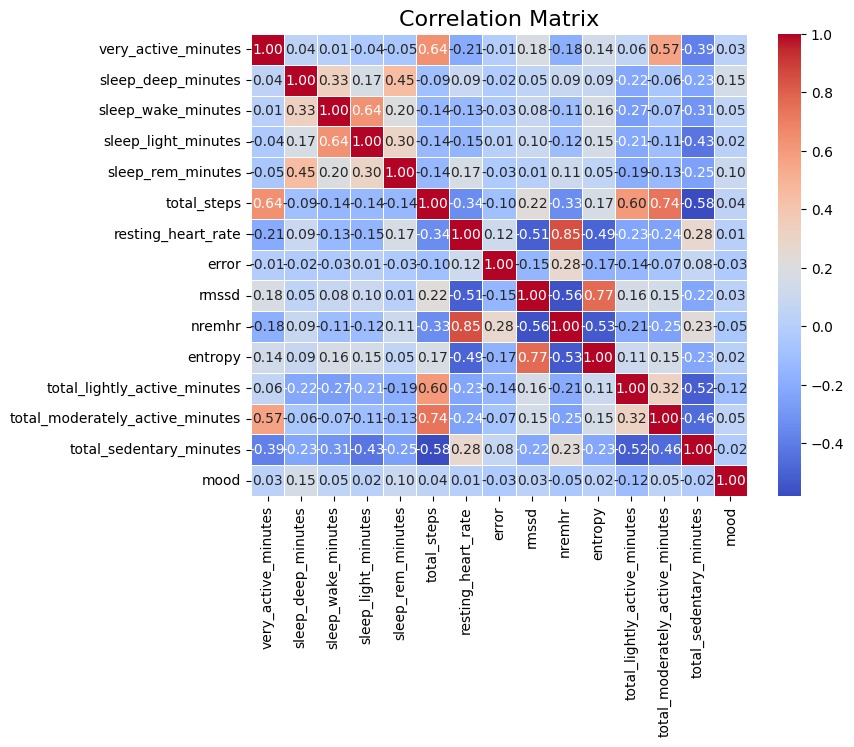

In [110]:
df = pd.read_csv('df_complete.csv')

df = df.dropna()

df = df.drop('id', axis=1)
df = df.drop('user_id', axis=1)
df = df.drop('date', axis=1)
corr = df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()